In [66]:
from matplotlib import animation
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from itertools import product
import numpy as np
import tensorflow_probability as tfp

tfd = tfp.distributions 

In [60]:
path = "../../../elicit/simulations/results/data/deep_prior/"
file = "binom_skewed_deep_spline_56790852"

final_res = pd.read_pickle(path+file+"/final_results.pkl")
expert_res = pd.read_pickle(path+file+"/expert/prior_samples.pkl")

expert_loc = tf.reduce_mean(expert_res, (0,1))
expert_scale = tf.reduce_mean(tf.math.reduce_std(expert_res, 1), 0)

total_loss = tf.stack(final_res["loss"], -1)
component_loss = tf.stack(final_res["loss_component"], -1)
hyperparam_loc =  tf.stack(final_res["hyperparameter"]["means"], -1)
hyperparam_scale =  tf.stack(final_res["hyperparameter"]["stds"], -1)

linestyles = ["dotted", "dashed"]
color_betas = ["#0766AD", "#C5E898"]

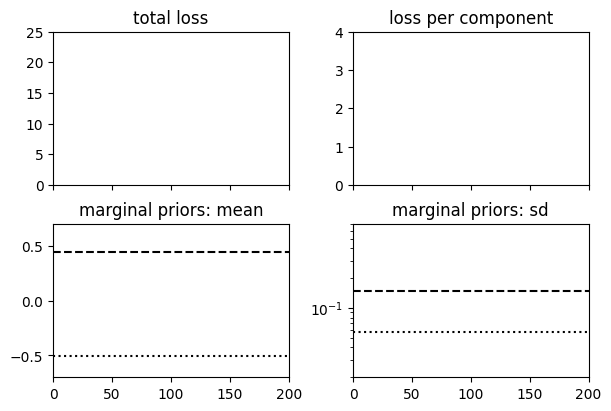

In [61]:
figure, axs = plt.subplots(2,2, constrained_layout=True, figsize=(6,4), sharex = True) 
def figure_func(epochs):
    conv = axs[0,0].plot(range(epochs), total_loss[:epochs], color = "#03396c")
    conv = [axs[0,1].plot(range(epochs), component_loss[i,:epochs], color = "#03396c") for i in range(component_loss.shape[0])]
    conv = [axs[1,0].axhline(expert_loc[i], linestyle = linestyles[i], color = "black") for i in range(expert_loc.shape[0])]
    conv = [axs[1,1].axhline(expert_scale[i], linestyle = linestyles[i], color = "black") for i in range(expert_loc.shape[0])]
    conv = [axs[1,0].plot(range(epochs), hyperparam_loc[i,:epochs], lw =2, color = color_betas[i]) for i in range(hyperparam_loc.shape[0])]
    conv = [axs[1,1].plot(range(epochs), hyperparam_scale[i,:epochs], lw =2, label = fr"$\lambda_{i}$",color = color_betas[i]) for i in range(hyperparam_scale.shape[0])]
    conv = axs[1,0].set_ylim(-0.7, 0.7)
    conv = axs[0,0].set_ylim(0., 25.)
    conv = axs[0,1].set_ylim(0., 4.)
    conv = axs[1,1].set_ylim(0.02, 0.7)
    conv = axs[1,1].set_yscale("log") 
    conv = axs[1,1].set_xlim(0,200) 
    conv = [axs[0,i].set_title(t) for i,t in enumerate(["total loss", "loss per component"])]
    conv = [axs[1,i].set_title(t) for i,t in enumerate(["marginal priors: mean", "marginal priors: sd"])] 
    
    return conv
    
def animate(frame):
    epoch = tf.range(200)
    epochs = epoch[frame]
    figure_func(epochs)
    
anim = animation.FuncAnimation(figure, animate, frames=50, interval=10)
#anim.save("convergence.gif")

In [62]:
from IPython.display import HTML
HTML(anim.to_jshtml())

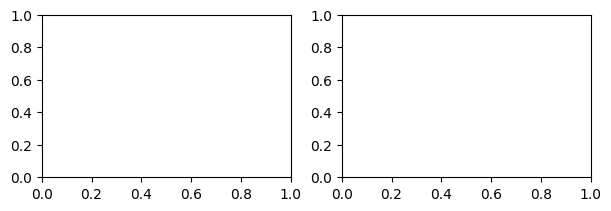

In [86]:
x_seq = np.arange(-4, 4, 0.01)
figure2, axs = plt.subplots(1,2, constrained_layout = True, figsize = (6,2))
def figure2(epochs):
    dens, = axs[0].plot(x_seq, tfd.Normal(hyperparam_loc[0,epochs], hyperparam_scale[0,epochs]).prob(x_seq))
    dens, = axs[1].plot(x_seq, tfd.Normal(hyperparam_loc[0,epochs], hyperparam_scale[0,epochs]).prob(x_seq))
    return dens

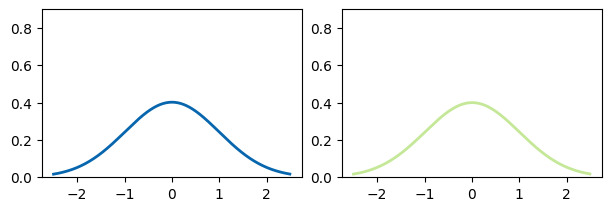

In [101]:
x_seq = np.arange(-2.5, 2.5, 0.01)
figure2, axs = plt.subplots(1,2, constrained_layout = True, figsize = (6,2))
def figure2_func(epochs):
    dens = [axs[i].clear() for i in range(2)]
    #dens = [axs[i].plot(x_seq, tfd.Normal(expert_loc[i], expert_scale[i]).prob(x_seq), color = "black", linestyle = "dashed", lw = 2) for i in range(2)]
    dens = [axs[i].plot(x_seq, tfd.Normal(hyperparam_loc[i,epochs], hyperparam_scale[i,epochs]).prob(x_seq), color = color_betas[i], lw = 2) for i in range(2)]
    dens = [axs[i].set_ylim(0,0.9) for i in range(2)]
    return dens

def animate(frame):
    epoch = tf.range(200)
    epochs = epoch[frame]
    figure2_func(epochs)
    
    
anim2 = animation.FuncAnimation(figure2, animate, frames=50, interval=10)

from IPython.display import HTML
HTML(anim2.to_jshtml())